In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, auc
)
from sklearn.preprocessing import StandardScaler

###Load Dataset

In [4]:
data = pd.read_csv('Employee_Salary_Dataset.csv')

In [5]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})


In [8]:
X = data[['Experience_Years', 'Age', 'Salary']]  # Independent variables
y = data['Gender']  # Target variable (binary)

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]


###Evaluate Model

In [13]:
conf_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_mat)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Confusion Matrix:
 [[2 2]
 [2 1]]
Accuracy: 0.42857142857142855
Precision: 0.3333333333333333
Recall: 0.3333333333333333
F1-Score: 0.3333333333333333


###Plot ROC Curve and Compute AUC

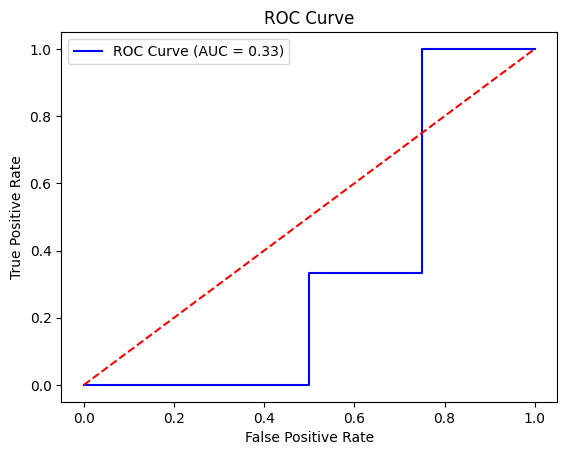

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()